In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
muslimp=pd.read_csv(r"C:\Users\joshd\Downloads\Muslim%_Constituency.csv")
votep=pd.read_csv(r"C:\Users\joshd\Downloads\CombinedVoteshare-new.csv")

In [5]:
votep['Share']=votep['Share']*100
votep.head()

,ONSID,Constituencyname,Countryname,Share
0,E14001065,Altrincham and Sale West,England,1.2497
1,E14001070,Ashton-under-Lyne,England,7.9947
2,E14001071,Aylesbury,England,1.0332
3,E14001072,Banbury,England,1.7643
4,E14001073,Barking,England,11.8732


In [6]:
muslimp.head(5)

,Observation,ConstituencyCode,ConstituencyName
0,2.230265,E14001063,Aldershot
1,2.203919,E14001064,Aldridge-Brownhills
2,6.405810,E14001065,Altrincham and Sale West
3,0.242471,E14001066,Amber Valley
4,0.263440,E14001067,Arundel and South Downs


In [10]:
a=votep.merge(muslimp,how='left',left_on='Constituencyname',right_on='ConstituencyName')
a.drop(['ConstituencyCode','ConstituencyName'],inplace=True,axis=1)
a['Share'].fillna(0)
a.head()

,ONSID,Constituencyname,Countryname,Share,Observation
0,E14001065,Altrincham and Sale West,England,1.2497,6.405810
1,E14001070,Ashton-under-Lyne,England,7.9947,10.562775
2,E14001071,Aylesbury,England,1.0332,8.715194
3,E14001072,Banbury,England,1.7643,3.718053
4,E14001073,Barking,England,11.8732,27.562474


In [11]:
plt.style.use('bmh')

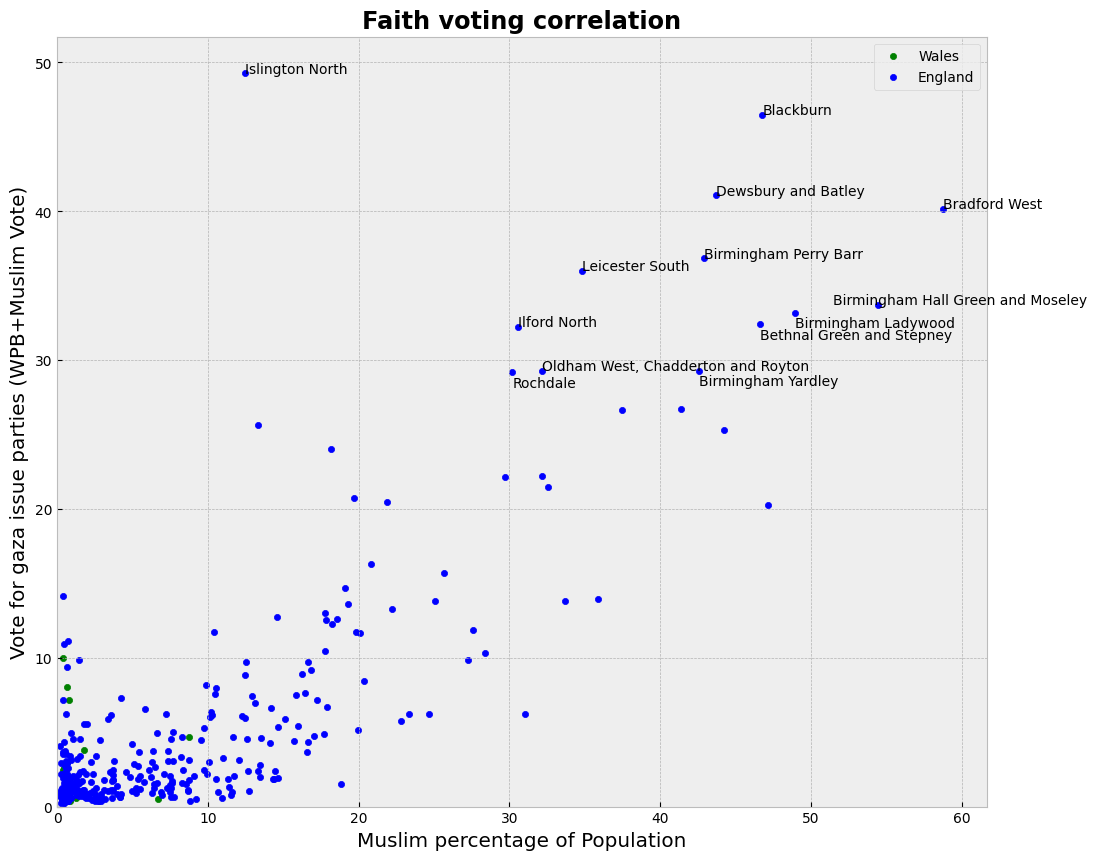

In [29]:
fig, ax = plt.subplots(figsize=(12,10))
a.loc[a.Countryname=='Wales'].plot.scatter(x='Observation',y='Share',color='green',label='Wales',ax=ax)
a.loc[a.Countryname=='England'].plot.scatter(x='Observation',y='Share',color='blue',label='England',ax=ax)
ax.set_xlabel('Muslim percentage of Population',fontsize='x-large')
ax.set_ylabel('Vote for gaza issue parties (WPB+Muslim Vote)',fontsize='x-large')
plt.title('Faith voting correlation',fontsize='xx-large',fontweight='bold')
for n in range(len(a.Share)):
    if a['Share'][n]>28:
        if a['Constituencyname'][n] in ['Bethnal Green and Stepney','Birmingham Ladywood','Rochdale','Birmingham Yardley']:
            ax.annotate(a['Constituencyname'][n],(a['Observation'][n],a['Share'][n]-1))
        elif a['Constituencyname'][n] in ['Birmingham Hall Green and Moseley']:
            ax.annotate(a['Constituencyname'][n],(a['Observation'][n]-3,a['Share'][n]))
        else:
            ax.annotate(a['Constituencyname'][n],(a['Observation'][n],a['Share'][n]))
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.savefig("Sectarian-Voting-UK-2024-new.png",dpi=200)

In [30]:
a['Share'].corr(a['Observation'])

np.float64(0.8149508709882718)